# Codeathon 1: Comparison of Regression Models on Housing Prices in Ames, Iowa

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
![(Image Credit Boston.gov)](https://miro.medium.com/max/1000/1*WYZCnpM7bE3Wq4NNxx7jDA.jpeg)

In this assignment, You are in charge of building a system to predict housing prices in Ames, Iowa. You need to find the best model given the Iowa Housing dataset, and then see if you can improve its performance further by tuning its hyperparameters.  You must evaluate your model using RMSE with 5-fold cross-validation. You can use Python’s Scikit-Learn API and Google Colab to present your solution and performance to your peers.

* **DOWNLOAD**: Download from Kaggle the Iowa Housing datasetLinks to an external site. in the [Ames Housing Dataset on Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data). You will attempt to predict the housing prices in Ames, IA. For references, you may refer to my slides or the Google Colab if you need additional sample codes to help with your assignment. To get started, you will need to upload/copy the dataset (.csv) into the same Colab workspace.

* **CODE**: Using this provided template, apply the 8 main steps of an ML project on the selected data set. Write code in a Google Colab, download as a .ipynb file and submit via GradeScope before the deadline. For deliverables, you must write code in Colab and submit the downloaded Jupyter Notebook file (.ipynb) to earn a total of 50 pts. You will gain points depending on how you perform in the following sections.

* **PRESENT** (Optional): In a later class meeting, give a lightning talk to pitch your solution in 3-5 minutes. Prepare a presentation (in Google Slides) and email me the URL to be considered (3-5 submissions will be selected to present). You will earn 10 bonus points if you are not already one of the top 10 submissions.

**BONUS POINTS:** 10 bonus points will be given (as Extra credits) for those who score among the top-10 leaderboard while following strictly the assignment guidelines. Best of luck to all!

**IMPORTANT**: You must name your submission yourUVAID_codeathon_1.ipynb








## Step 1: Big Picture and Setup
Write a paragraph explaining the context of the problem in which you are trying to investigate. Your paragraph may frame the problem and objectives by answering the following questions:
* What is the task: regression, classification, clustering, visualization?
* What to expect, how to use, and how to benefit from this model?
* What performance measure to evaluate?
* How much data is available or should be collected?
* What learning algorithm to be used?
* How much effort is to be spent?
* Verify the assumptions that have been made about the context

The current task at hand is to create a model that will best predict housing prices in Ames, which is a regression task. The model will learn from historical housing data to estimate the sale price of a house based on its features. To make predictions with this model, you need to provide it with the necessary input data, which consists of a set of relevant features that describe the house. Once the model receives this input, it will process the data and generate an output, which is the predicted price of the home based on the given features. The model can help various stakeholders in the real estate market make more informed, data-driven decisions. The performance measure used to evaluate the housing price prediction model is the root mean square error (RMSE) with 5-fold cross-validation. The data is the data provided by the Kaggle. The training dataset has 1460 entries each with 79 different explanatory variables. I will explore various learning algorithms including linear regression, decision tree regression, random forests, and gradient regression boosting to determine which learning algorithm performs the best. Given the time frame of this project, I will do my best to create and fine-tune an algorithm that will predict housing prices with reasonable error. It is reasonable to assume that given a house of similar values for each given feature, it will have a similar value. If this assumptions does not hold, then our regression model would fail to predict a given houses price based on its features.

In [217]:
# Importing necessary libraries
import sklearn 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np 
np.random.seed(19)

## Step 2: Load the Data
We will assume that the data file is put into the same workspace on Colab. Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
 * How many entries does it have?
 * How many features does it have?
 * Does it contain any categorical data?
 * Is there any missing values?
 * What are some basic statistics you can learn right away about this dataset?

In [218]:
# To help you get started, a load function is provided below.
# You will need to fill in the code under #TODO to make it work.
def loadAmesHousingData():
  # The column names are adopted from the dataset page on Kaggle
  housing = pd.read_csv('data\\train.csv', index_col = "Id")
  return housing

housing = loadAmesHousingData()
housing.head(20)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [219]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [220]:
housing.shape

(1460, 80)

In [221]:
# Listing all categorical columns by filtering columns of type object
categorical_columns = housing.select_dtypes(include=['object']).columns
categorical_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [222]:
# Listing all columns with numerical values by filtering columns of type int64 and float64
numerical_columns = housing.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [223]:
# Create df that contains columnds with NaN values
missing_values = housing.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
columns_with_missing_values

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [224]:
# Basic statistics for numerical columns
housing.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Step 3. Discover and visualize the data to gain insights
**Data Discovery:** Plot out all correlations among the features. You should notice some features are more correlated with your predicted value than others. This information will help you confirm the weights of your regression model later on.

In [225]:
# Split the data into train set (80%) and test set (20%)
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=19)

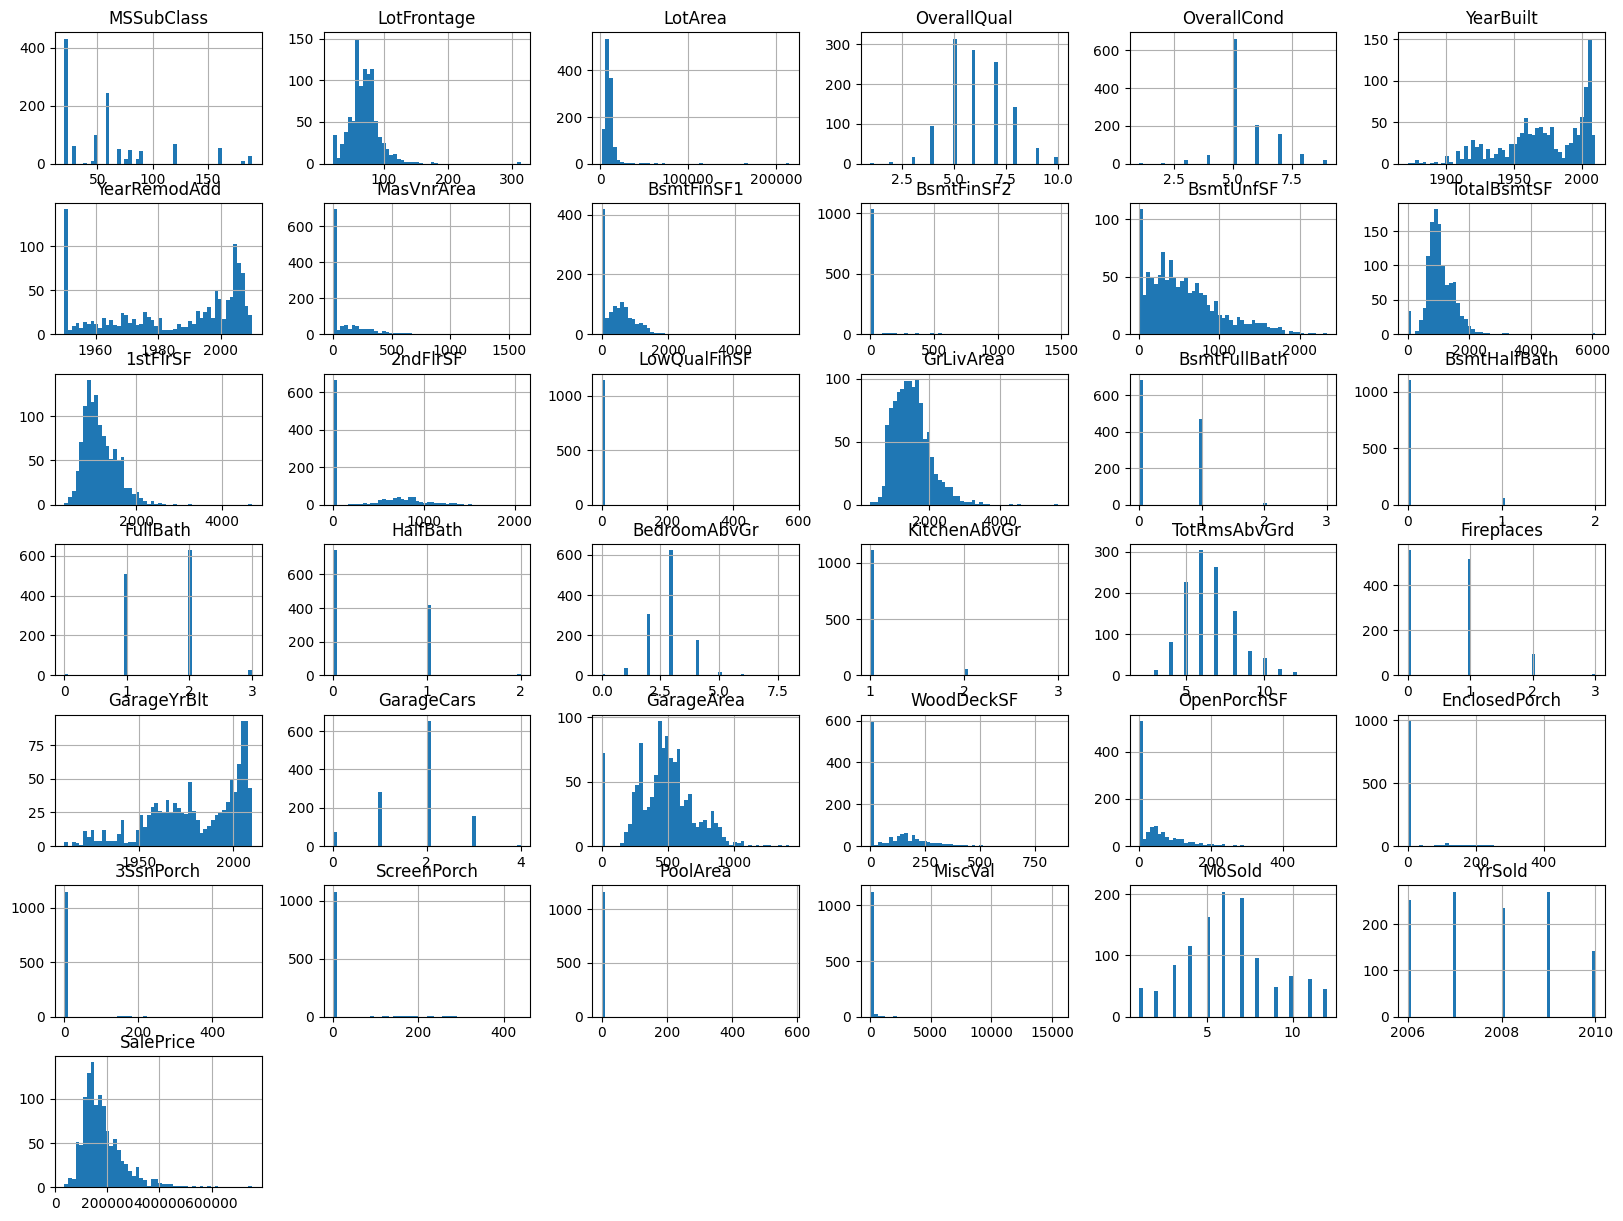

In [226]:
# Plotting out numerical data frequency as histogram
train_set.hist(bins=50, figsize=(20,15))
plt.show()

In [227]:
# Let's look at how much each feature correlates to the house value
corr_matrix = train_set.corr(numeric_only=True)
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.795247
GrLivArea        0.720271
GarageCars       0.644527
GarageArea       0.633384
TotalBsmtSF      0.628870
1stFlrSF         0.624637
FullBath         0.560657
TotRmsAbvGrd     0.543629
YearBuilt        0.536507
YearRemodAdd     0.514621
GarageYrBlt      0.502677
MasVnrArea       0.496964
Fireplaces       0.472533
BsmtFinSF1       0.397928
LotFrontage      0.357832
WoodDeckSF       0.331918
OpenPorchSF      0.319834
2ndFlrSF         0.314430
HalfBath         0.291185
LotArea          0.277902
BsmtFullBath     0.231903
BsmtUnfSF        0.226718
BedroomAbvGr     0.166143
ScreenPorch      0.116933
PoolArea         0.106230
MoSold           0.050746
3SsnPorch        0.048686
BsmtHalfBath    -0.007805
BsmtFinSF2      -0.012853
LowQualFinSF    -0.015923
YrSold          -0.016795
MiscVal         -0.030106
OverallCond     -0.077760
MSSubClass      -0.097725
EnclosedPorch   -0.132549
KitchenAbvGr    -0.146085
Name: SalePrice, dtype: float64

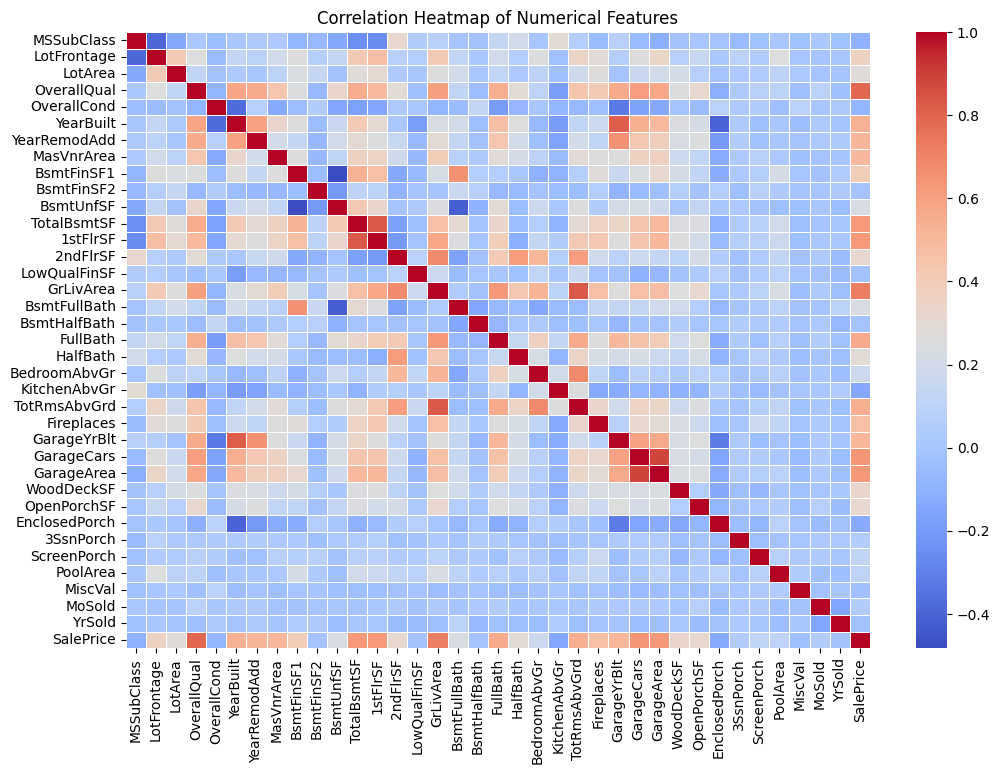

In [228]:
# Plotting the correlation of every numerical feature to every other numerical feature
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

array([[<Axes: xlabel='OverallQual', ylabel='OverallQual'>,
        <Axes: xlabel='GrLivArea', ylabel='OverallQual'>,
        <Axes: xlabel='GarageCars', ylabel='OverallQual'>,
        <Axes: xlabel='GarageArea', ylabel='OverallQual'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='OverallQual'>,
        <Axes: xlabel='1stFlrSF', ylabel='OverallQual'>,
        <Axes: xlabel='FullBath', ylabel='OverallQual'>,
        <Axes: xlabel='TotRmsAbvGrd', ylabel='OverallQual'>,
        <Axes: xlabel='YearBuilt', ylabel='OverallQual'>,
        <Axes: xlabel='YearRemodAdd', ylabel='OverallQual'>],
       [<Axes: xlabel='OverallQual', ylabel='GrLivArea'>,
        <Axes: xlabel='GrLivArea', ylabel='GrLivArea'>,
        <Axes: xlabel='GarageCars', ylabel='GrLivArea'>,
        <Axes: xlabel='GarageArea', ylabel='GrLivArea'>,
        <Axes: xlabel='TotalBsmtSF', ylabel='GrLivArea'>,
        <Axes: xlabel='1stFlrSF', ylabel='GrLivArea'>,
        <Axes: xlabel='FullBath', ylabel='GrLivArea'>,
        <Axes

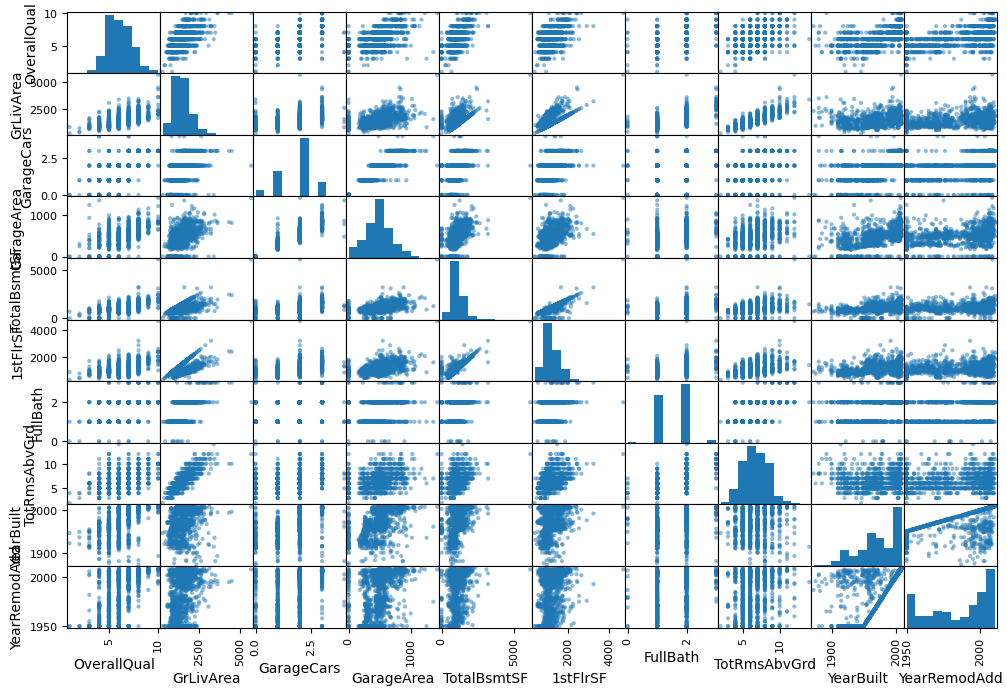

In [229]:
# Plotting the scatter matrix for the top 10 correlated features to Sales Price
top_ten_correlated_features = corr_matrix["SalePrice"].sort_values(ascending=False).index[1:11]
scatter_matrix(train_set[top_ten_correlated_features], figsize=(12, 8))

##  Step 4: Data Preparation and Cleaning
Since we can only use the "train.csv", you have to "artificially" split the data into training set, validation set, and test set. You may use the `train_test_split()` function *twice*: first is to split into train and test, then to split the train again into training and validation sets.

Next, you need to construct the following:

* **Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the `Imputer` class.

* **Feature Scaling:** Your task is to call the `StandardScaler` to normalize the value of each feature.

* **Transformation Pipeline:** More importantly, you will need to integrate the above operations into a `Pipeline` to process and transform the training data (via `fit_transform()`), then use the same pipeline to transform any validation and testing data (using `transform()` only).

In [230]:
# Your code check for missing values, feature scaling, and put all transformation into a pipeline here

# Re-lable housing to be the housing train set and drop SalePrice
housing = train_set.drop("SalePrice", axis=1) 
housing_labels = train_set["SalePrice"].copy()

# I am choosing to handle MSSubClass as a nominal categorial variable and OverallQual and OverallCond as ordinal categorial variables
housing['MSSubClass'] = housing['MSSubClass'].astype(str)
housing['OverallQual'] = housing['OverallQual'].astype(str)
housing['OverallCond'] = housing['OverallCond'].astype(str)

In [231]:
# Create df that contains columnds with NaN values
train_missing_values = housing.isnull().sum()
train_columns_with_missing_values = train_missing_values[train_missing_values > 0]
train_columns_with_missing_values

LotFrontage      213
Alley           1091
MasVnrType       689
MasVnrArea         8
BsmtQual          32
BsmtCond          32
BsmtExposure      32
BsmtFinType1      32
BsmtFinType2      33
Electrical         1
FireplaceQu      553
GarageType        72
GarageYrBlt       72
GarageFinish      72
GarageQual        72
GarageCond        72
PoolQC          1163
Fence            953
MiscFeature     1122
dtype: int64

In [232]:
# Listing all columns with numerical values by filtering columns of type int64 and float64
train_numerical_columns = housing.select_dtypes(include=['int64', 'float64']).columns
train_numerical_columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [233]:
# Establish all ordinal columns
train_ordinal_columns = ["LotShape", "LandSlope", "OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "KitchenQual", "FireplaceQu", "GarageFinish", "GarageQual", "GarageCond", "PoolQC"]

In [234]:
# Listing all categorical columns by filtering columns of type object
train_categorical_columns = housing.select_dtypes(include=['object']).columns
train_categorical_columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [235]:
# Allows One Hot Encoder to encode this value
housing[train_categorical_columns] = housing[train_categorical_columns].fillna('None')

In [236]:
# Filtering to obtain the nominal categorical columns
train_ordinal_columns_set = set(train_ordinal_columns)
nominal_categorical_columns = [col for col in train_categorical_columns if col not in train_ordinal_columns_set]
nominal_categorical_columns

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LandContour',
 'Utilities',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageType',
 'PavedDrive',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [237]:
# Pipeline
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, train_numerical_columns),
        ("cat", OneHotEncoder(handle_unknown='ignore'), train_categorical_columns),
        ("ord", OrdinalEncoder(), train_ordinal_columns),
    ])

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared 

<1168x344 sparse matrix of type '<class 'numpy.float64'>'
	with 110257 stored elements in Compressed Sparse Row format>

## Step 5: Model Selection
You should use (at the minimum) the basic ML models which we’ve covered: `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. Optionally, you may go for the extra miles by doing some research and try some more advanced models (ie. `Artificial Neural Networks`). You may use `RMSE` as the performance measure.

You must use 5-fold CV on the data set to evaluate the performance of your models (following the sample codes on Colab 02).


In [238]:
# Try a few models here
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-scores)
lin_rmse_scores.mean()

42349.24112967857

In [239]:
tree_reg = DecisionTreeRegressor(random_state=19)
tree_reg.fit(housing_prepared, housing_labels)
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores.mean()

41747.65901646738

In [240]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=19)
forest_reg.fit(housing_prepared, housing_labels)
scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-scores)
forest_rmse_scores.mean()

28906.747069986584

In [241]:
gbrt_reg = GradientBoostingRegressor(n_estimators=100, random_state=19)
gbrt_reg.fit(housing_prepared, housing_labels)
gbrt_scores = cross_val_score(gbrt_reg, housing_prepared, housing_labels,
                              scoring="neg_mean_squared_error", cv=5)
gbrt_rmse_scores = np.sqrt(-gbrt_scores)
gbrt_rmse_scores.mean()

27873.95788709471

Continuing with the Gradiant Boosting Regressor model because it has the lowest RMSE

## Step 6: Model Tuning

In this step, you should attempt to use one of the provided tools for hyperparameter tuning: `GridSearchCV`, `RandomizedSearchCV` to identify the best set of hyperparameters for your model. After tweaking your models, you eventually should report the 5-fold CV RMSE of your tuned model.

In [242]:
# Conduct Randomized Search to find best hyper parameters
param_distribs = {
    'n_estimators': randint(low=100, high=1000),  
    'max_features': randint(low=1, high=344),    
}

gbrt_reg = GradientBoostingRegressor(random_state=19)

rnd_search = RandomizedSearchCV(gbrt_reg, param_distributions=param_distribs,
                                n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=19, n_jobs=-1)

rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=19),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001AD8C9032C0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001AD83F359D0>},
                   random_state=19, scoring='neg_mean_squared_error')

In [243]:
# Inspect what parameters lead to what RSME
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

28239.574195378464 {'max_features': 94, 'n_estimators': 722}
26891.18098929084 {'max_features': 246, 'n_estimators': 454}
29747.307242743434 {'max_features': 20, 'n_estimators': 408}
28340.51187593915 {'max_features': 331, 'n_estimators': 771}
27755.55034042958 {'max_features': 323, 'n_estimators': 540}
29329.402556066725 {'max_features': 23, 'n_estimators': 262}
28443.05961552538 {'max_features': 98, 'n_estimators': 366}
27924.540607662166 {'max_features': 343, 'n_estimators': 406}
26542.023598833606 {'max_features': 168, 'n_estimators': 883}
27898.184350841857 {'max_features': 232, 'n_estimators': 907}
27536.633569538546 {'max_features': 328, 'n_estimators': 877}
28165.964601422496 {'max_features': 204, 'n_estimators': 301}
28333.94132694217 {'max_features': 261, 'n_estimators': 953}
28088.803017702543 {'max_features': 338, 'n_estimators': 469}
28225.626883665755 {'max_features': 195, 'n_estimators': 153}
27652.297864466294 {'max_features': 292, 'n_estimators': 413}
30625.93222893845

In [244]:
# Extract the importance level of each feature
numerical_columns = train_numerical_columns
categorical_encoder = full_pipeline.named_transformers_['cat']
categorical_columns = categorical_encoder.get_feature_names_out(train_categorical_columns)
ordinal_columns = train_ordinal_columns
all_feature_names = list(numerical_columns) + list(categorical_columns) + list(ordinal_columns)
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(feature_importances_df)

                  Feature  Importance
12              GrLivArea    0.164508
328           OverallQual    0.125963
8             TotalBsmtSF    0.121192
330             ExterQual    0.072001
22             GarageCars    0.055826
..                    ...         ...
272     GarageType_2Types    0.000000
200          ExterCond_Po    0.000000
77   Neighborhood_Blueste    0.000000
78    Neighborhood_BrDale    0.000000
155      RoofMatl_Membran    0.000000

[344 rows x 2 columns]


In [245]:
# Use best model on the test set
final_model = rnd_search.best_estimator_

X_test = test_set.drop("SalePrice", axis=1)
y_test = test_set["SalePrice"].copy()

X_test['MSSubClass'] = X_test['MSSubClass'].astype(str)
X_test['OverallQual'] = X_test['OverallQual'].astype(str)
X_test['OverallCond'] = X_test['OverallCond'].astype(str)
X_test[train_categorical_columns] = X_test[train_categorical_columns].fillna('None')

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

31884.26387898234

## Step 7: Solution Presentation
Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/supervisor). Focus on answering the following:

* How can you pitch your solution to this project?
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution?

I would pitch my solution by describing the process that I took to arrive at this optimized model. I would pitch how after cleaning the data, I tried multiple different regression models including a linear regression with a RSME of 42349, decision tree with a RSME of 41747, a random forest with a RSME of 28906, and a gradient boosting regressor with RSME of 27873. I ended up selecting the gradient boosting regressor as it yielded the lowest RSME of all the models. I then further fine tuned this model's max_features and n_estimators parameters using a randomized search. When I tested this model on the test set it yielded a final RSME value of 31884 which makes sense as this is now evaluating the test set which was independent of training. Through little improvements and optimizations at each stage, I was able to produce a highly optimized regression model.

I learned that the features that correlate the most with the price of the house ended up having the highest weight in the final model. For example, the square feet of the living area, the overall finish and material of the house, and the square feet of the basement were both variables that were highly correlated to the price of the house and weighted highly in the final model.

Some insights as to how we can improve the solution is to collect more data. By collecting more data, we will be able to make better generalizations and see trends that we might not be able to see now with this data. More data would also reduce the effect of any bias that may have occurred when collecting the current data. It would also be helpful to conduct more feature engineering and form features that do not already exist in the data. For example, it could have been helpful to know the average price of the house in a given neighborhood as this would indicate generally how wealthy a given neighborhood is which could affect the price of a house.

## Step 8: Model Launching, Monitoring, and Updating
You don't need to do anything for this step. However, in the real-world, this is an iterative process where you launch, monitor, and update your model (on the cloud).

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my slides and/or the textbook
 * Talk to the TA, they are available and there to help you during their office hours
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Codeathon 1:...".

Best of luck and have fun!